# FINAL PROJECT: MONTE CARLO INTEGRATION

### In this code, we will perform a Monte Carlo Integration over any given function inside of a box [a,b], [c,d] and report the numerical results of our integration as well as try to animate the actual monte carlo integrational analysis.

In [514]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

# PART 1: MONTE-MARLON

#### 1) Write a scheme to compute a Monte Carlo integral for any specified function. The integration scheme should take a defined function as a parameter, along with the domain limits x=[a,b]. The domain y=[c,d] should be determined for the function considered automatically.

## Define the function f(x):

In [515]:
def f_x(var):
    return np.cos(var)

## Now, define the parameters of the function:

In [516]:
n = 10000 # Number of samples

a = 0 # lower x bound
b = 1.75 # upper x bound

# Call the function f(x)
var = np.linspace(a,b,n) # gives us an array with the parameters to integrate over
func = f_x(var) # gives us an array of all the values of f(x) -> array of y values

c = min(f_x(var)) # lower y bound
d = max(f_x(var)) # upper y bound

if c > np.NINF: # check to see if it goes to infinity
    c = min(f_x(var))
else:
    c = f_x(a)
print(c)
    
if d < np.inf: #check to see if it goes to infinity
    d = max(f_x(var))
else:
    d = f_x(b)
print(d)

-0.17824605564949209
1.0


## Next, define the Monte Carlo Integration method:

In [517]:
# Define the Monte Carlo Parameters:
def mc_parameters(lower_x, upper_x, lower_y, upper_y):
    a_x = lower_x
    b_x = upper_x
    c_y = lower_y
    d_y = upper_y
    return a_x,b_x,c_y,d_y

In [518]:
# Define the integration method with the mc_parameters

# Call mc_parameters
sample = mc_parameters(a,b,c,d)

# need two sample arrays where x -> [a_x,b_x] from mc_parameters
x = np.random.uniform(sample[0],sample[1],n)

# y -> [c_y,d_y] from mc_parameters
y = np.random.uniform(sample[2],sample[3],n)

In [519]:
# Now, we will check if our samples are within the bounds
ir_pos = []
ur_pos = []
ir_neg = []
ur_neg = []


for i in range(n):
    
    
    if((y[i])>0):
        if((y[i])<(f_x(x)[i])):
            n = i
            ir_pos.append(n)
            
        elif((y[i])>(f_x(x)[i])):
            n = i
            ur_pos.append(n)
            
            
    elif((y[i])<0):
        if((y[i])>(f_x(x)[i])):
            n = i
            ir_neg.append(n)
            
        elif((y[i])<(f_x(x)[i])):
            n = i
            ur_neg.append(n)

# PART TWO: 

<small><small>2) Engineer a method for specifying a tolerance for the Monte Carlo integration. Note this tolerance can refer to the absolute difference between two numerical estimates of the integral.

In [520]:
def trapezoid_core(f_x,var,h):
    return 0.5*h*(f_x(var+h)+f_x(var))

In [521]:
def trapezoid_method(f_x,a,b,n,):     #left side of the integral
    # f == function to integrate
    # a == lower limit of integration
    # b = upper limit of integration
    # n == number of interbals to use
    
    # define x values to preform the trapezoid rule
    h = var[1]-var[0]
    
    # define the value of the integral
    Fint = 0.0
    
    # preform the integral using the trapezoid method
    for i in range(0,len(var)-1,1):
        Fint += trapezoid_core(f_x,var[i],h)
        
    # return the answer
    return Fint

In [522]:
t_float = (float(trapezoid_method(f_x,a,b,n)))
print("Trapezoid")
print(trapezoid_method(f_x,a,b,n))
print("Trapezoid Float")
print((t_float))

Trapezoid
0.9839859443622234
Trapezoid Float
0.9839859443622234


# Monte Carlo Approx:

In [523]:
area_rectangle = ((abs(a)+abs(b)) *((abs(c))+(abs(d))))
x_mc =(len(ir_pos)-len(ir_neg))

monte_carlo_approx = ((area_rectangle*(x_mc))/(float(n)))
    
print ("Monte Carlo")
print (monte_carlo_approx)
print("total number dots inside fxn")
print(x_mc)
print("x_try")
print(x_try)
print(x_try_1)

Monte Carlo
1.0013736354544838
total number dots inside fxn
4856
x_try
2.0067306431732135
0.48564856485648566


# Error

In [524]:
#define what is close to zero because of symetry we will not be able to accurately test for error

error=((abs(monte_carlo_approx - t_float))/(t_float))

np.isclose(t_float, float(0), rtol= 0 , atol=1e-10, equal_nan=True)

if t_float <= 0 :
    error = "Not Applicable"
    print("tolerance undefined because symetry")
else:
    print((abs(monte_carlo_approx) - (t_float))/(t_float))

print(error)

0.017670670187804653
0.017670670187804653


# PART THREE:

<small> <small> 3) Have the Monte Carlo integrator produce a plot of f(x) over the domain x=[a,b] and y=[c,d], and overplot the samples (as small colored dots, with points above and below the line f(x) as distinctive colors. Have the plot contain the answer to the integral as “F(a,b) = XXX” where XXX is the floating point answer. Make a legend for f(x), and the dots above and below f(x).

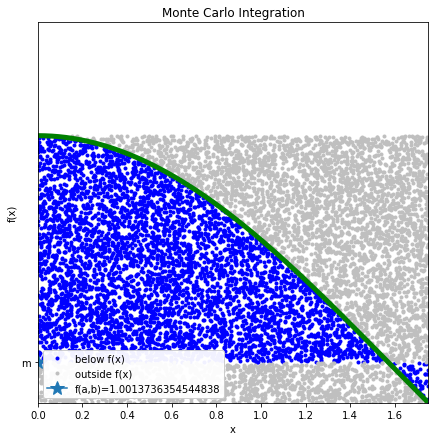

In [528]:
fig = plt.figure(figsize=(7,7))
plt.xlim([sample[0],sample[1]]) #Confines x axis to sample box
plt.ylim([sample[2],1.5]) #Confines y axis to sample box
# Plot points inside integral
plt.plot(x[ir_pos],y[ir_pos],'.',color='blue', label = 'below f(x)')
plt.plot(x[ir_neg],y[ir_neg],'.',color='blue')
# Plot points outside integral
plt.plot(x[ur_pos],y[ur_pos],'.',color='0.75', label = 'outside f(x)')
plt.plot(x[ur_neg],y[ur_neg],'.',color='0.75')
# Plot graph f(x)
plt.plot(var,func,color='green',linewidth=5.0)
#plot floating point F(a,b) = XXX  
plt.plot('m', marker='*',markersize=15,label= f'f(a,b)={monte_carlo_approx}')

plt.title('Monte Carlo Integration')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc=3,framealpha=0.95)
plt.show()

# PART FOUR: 

 <small><small> 4) Test your model on cos(x) over the domain x = [0,1.75]